In [3]:
pip install dash

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 660.6 kB/s eta 0:00:12
    --------------------------------------- 0.2/8.0 MB 2.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.0 MB 3.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/8.0 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.0 MB 3.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/8.0 MB 3.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.0 MB 4.1 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/8.0 MB 4.2 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 4.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.0 MB 4.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.3/8.0 MB 4.6 MB/s eta 0:00:02
   ------------ --------------------------- 2.5/8.0 MB 4.8 MB/s eta 0:00:02
   --------------

In [20]:
pip install -U kaleido

   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB 320.0 kB/s eta 0:03:27
   ---------------------------------------- 0.1/65.9 MB 812.7 kB/s eta 0:01:22
   ---------------------------------------- 0.2/65.9 MB 2.0 MB/s eta 0:00:33
   ---------------------------------------- 0.5/65.9 MB 2.7 MB/s eta 0:00:25
   ---------------------------------------- 0.7/65.9 MB 3.2 MB/s eta 0:00:21
    --------------------------------------- 0.9/65.9 MB 3.5 MB/s eta 0:00:19
    --------------------------------------- 1.2/65.9 MB 4.0 MB/s eta 0:00:17
    --------------------------------------- 1.4/65.9 MB 4.1 MB/s eta 0:00:16
   - -------------------------------------- 1.7/65.9 MB 4.4 MB/s eta 0:00:15
   - -------------------------------------- 1.9/65.9 MB 4.4 MB/s eta 0:00:15
   - -------------------------------------- 2.1/65.9 MB 4.6 MB/s eta 0:00:14
   - -------------------------------------- 2.3/65.9 MB 4.5 MB/s eta 0:00:15
  

In [23]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Sample data (Replace this with your actual data)
data = {
    "Reach Number": list(range(1, 26)),
    "2024-2020": [-57.89, -379.77, -188.68, 48.12, 72.41, -480.7, 774.81, -12.46, 349.13, 338.06,
                  220.63, 63.87, -57.78, 136.41, -512.65, -581.85, -101.59, 117.74, 275.48, -961.08,
                  -2425.34, -672.13, 57.92, -42.44, -58.7],
    "2020-2009": [-48.41, -34.48, -241.61, -16.14, -1.02, 20.38, 5.39, -42.87, 16.47, 25.97,
                  49.03, -5.91, -22.92, -51.99, -17.97, -53.2, -36.39, -103.78, -41.45, 78.85,
                  155.47, -60.87, -88.6, -71.66, -24.2],
    "2009-2000": [-26.47, 24.92, 60.03, -42.25, 12.80, 109.85, -48.61, 86.50, 194.57, 99.40,
                  -196.66, -52.19, 6.79, 37.94, 8.71, 14.43, -14.91, 54.24, 113.42, 166.80,
                  35.29, 84.51, 91.07, 50.55, 5.38],
    "2000-1990": [-0.26, 155.12, 123.93, 86.78, 20.28, 89.59, 164.35, 99.65, 232.69, 187.14,
                  -8.97, -12.86, -0.83, -35.25, 151.54, 44.68, -10.32, 180.85, 83.02, -15.32,
                  54.05, 115.90, 113.72, -16.67, 5.96],
    "1990-1973": [39.96, 53.68, 83.49, -33.71, 99.57, 154.26, 40.36, 24.97, 55.17, 48.86,
                  4.70, 5.50, 0.44, 29.06, 56.15, 473.13, 774.92, 526.17, 109.17, 138.58,
                  475.43, 488.10, 381.94, 207.87, -21.39],
    "1973-1943": [6.18, -75.67, -81.44, 51.00, 98.98, -47.65, -88.87, 51.22, 76.64, -71.39,
                  11.07, 76.35, 9.07, -9.42, 20.85, -84.15, 85.79, 64.45, -56.77, 33.75,
                  -112.57, -76.49, 46.80, 7.68, 46.66]
}

df = pd.DataFrame(data)

def export_all_years_plot():
    df_long = df.melt(id_vars=["Reach Number"], var_name="Time Period", value_name="Migration Rate")
    fig = px.line(
        df_long,
        x="Reach Number",
        y="Migration Rate",
        color="Time Period",
        title="River Migration Rate Over Different Years",
        labels={"Reach Number": "Reach Number", "Migration Rate": "River Migration Rate (m/year)"},
        markers=True
    )
    fig.write_image("River_Migration_All_Years.png", scale=2)
    print("Plot exported as 'River_Migration_All_Years.png'")

# Initialize Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("River Migration Rate Visualization", style={'textAlign': 'center', 'marginBottom': '20px'}),
    
    dcc.Dropdown(
        id="time_period_dropdown",
        options=[{"label": period, "value": period} for period in df.columns[1:]],
        value="2024-2020",
        multi=False,
        style={'width': '50%', 'margin': 'auto'}
    ),

    dcc.Graph(id="migration_graph")
])

# Callback to update graph
@app.callback(
    Output("migration_graph", "figure"),
    Input("time_period_dropdown", "value")
)
def update_graph(selected_period):
    fig = px.bar(
        df,
        x="Reach Number",
        y=selected_period,
        title=f"River Migration Rate ({selected_period})",
        labels={"Reach Number": "Reach Number", selected_period: "River Migration Rate (m/year)"},
        color=selected_period,
        color_continuous_scale="Plasma"  # Better contrast
    )
    
    y_max = max(df[selected_period].max(), 500)
    y_min = df[selected_period].min()
    
    fig.update_layout(
        yaxis=dict(range=[y_min, y_max + 100]),
        xaxis_title="Reach Number",
        yaxis_title="River Migration Rate (m/year)",
        hovermode="x unified",
        margin=dict(l=50, r=50, t=50, b=50),
        template="plotly_white"
    )

    return fig

# Run the function to export the plot
export_all_years_plot()

# Run the Dash app
if __name__ == "__main__":
    app.run(debug=True)




ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


Plot exported as 'River_Migration_All_Years.png'


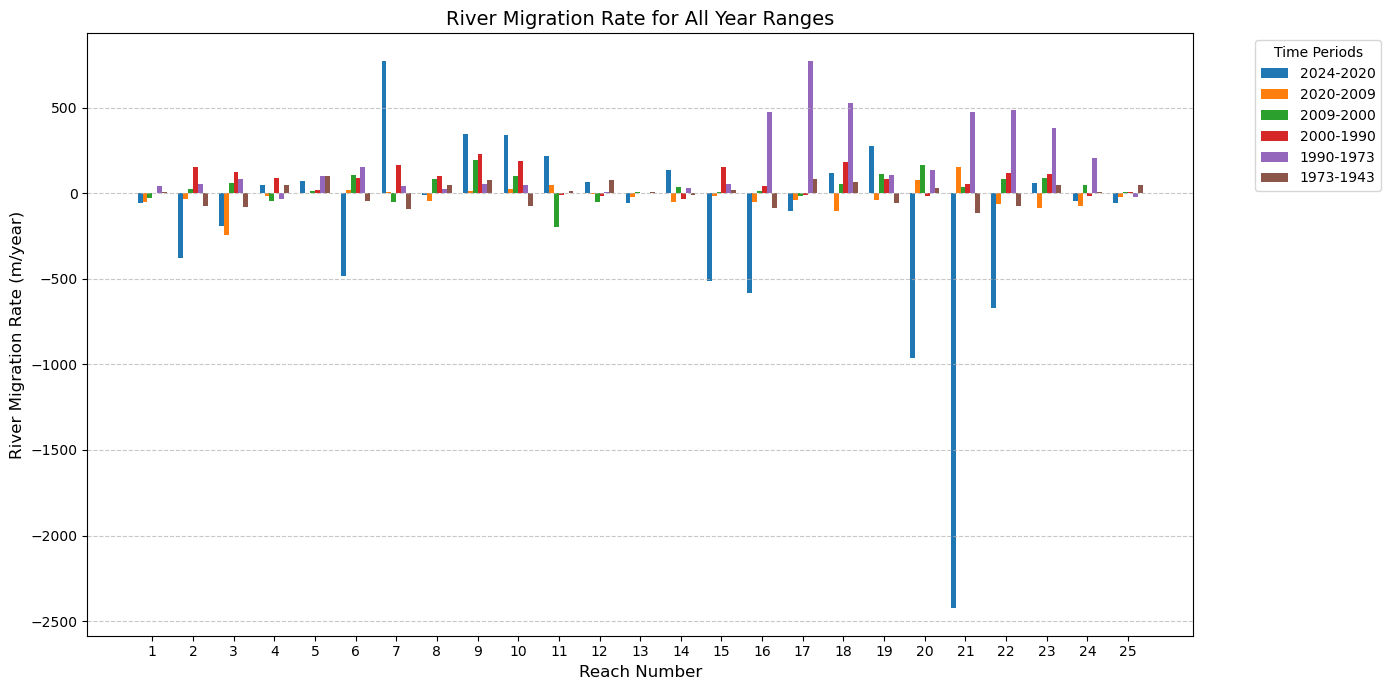

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    "Reach Number": list(range(1, 26)),
    "2024-2020": [-57.89, -379.77, -188.68, 48.12, 72.41, -480.7, 774.81, -12.46, 349.13, 338.06,
                  220.63, 63.87, -57.78, 136.41, -512.65, -581.85, -101.59, 117.74, 275.48, -961.08,
                  -2425.34, -672.13, 57.92, -42.44, -58.7],
    "2020-2009": [-48.41, -34.48, -241.61, -16.14, -1.02, 20.38, 5.39, -42.87, 16.47, 25.97,
                  49.03, -5.91, -22.92, -51.99, -17.97, -53.2, -36.39, -103.78, -41.45, 78.85,
                  155.47, -60.87, -88.6, -71.66, -24.2],
    "2009-2000": [-26.47, 24.92, 60.03, -42.25, 12.80, 109.85, -48.61, 86.50, 194.57, 99.40,
                  -196.66, -52.19, 6.79, 37.94, 8.71, 14.43, -14.91, 54.24, 113.42, 166.80,
                  35.29, 84.51, 91.07, 50.55, 5.38],
    "2000-1990": [-0.26, 155.12, 123.93, 86.78, 20.28, 89.59, 164.35, 99.65, 232.69, 187.14,
                  -8.97, -12.86, -0.83, -35.25, 151.54, 44.68, -10.32, 180.85, 83.02, -15.32,
                  54.05, 115.90, 113.72, -16.67, 5.96],
    "1990-1973": [39.96, 53.68, 83.49, -33.71, 99.57, 154.26, 40.36, 24.97, 55.17, 48.86,
                  4.70, 5.50, 0.44, 29.06, 56.15, 473.13, 774.92, 526.17, 109.17, 138.58,
                  475.43, 488.10, 381.94, 207.87, -21.39],
    "1973-1943": [6.18, -75.67, -81.44, 51.00, 98.98, -47.65, -88.87, 51.22, 76.64, -71.39,
                  11.07, 76.35, 9.07, -9.42, 20.85, -84.15, 85.79, 64.45, -56.77, 33.75,
                  -112.57, -76.49, 46.80, 7.68, 46.66]
}

df = pd.DataFrame(data)

# Function to export all year ranges in one bar chart
def export_all_years_plot():
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Define bar width and positions
    bar_width = 0.12
    reach_numbers = np.array(df["Reach Number"])
    
    # Plot bars for each time period
    for i, period in enumerate(df.columns[1:]):
        ax.bar(reach_numbers + i * bar_width, df[period], width=bar_width, label=period)

    # Labels and title
    ax.set_xlabel("Reach Number", fontsize=12)
    ax.set_ylabel("River Migration Rate (m/year)", fontsize=12)
    ax.set_title("River Migration Rate for All Year Ranges", fontsize=14)
    
    # Formatting legend and grid
    ax.legend(title="Time Periods", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.grid(axis='y', linestyle="--", alpha=0.7)

    # Adjust x-axis ticks to align with grouped bars
    plt.xticks(reach_numbers + (len(df.columns[1:]) - 1) * bar_width / 2, reach_numbers)
    plt.tight_layout()

    # Save the figure
    plt.savefig("River_Migration_All_Years.png", dpi=300)
    print("Plot exported as 'River_Migration_All_Years.png'")

# Run the function to export the plot
export_all_years_plot()





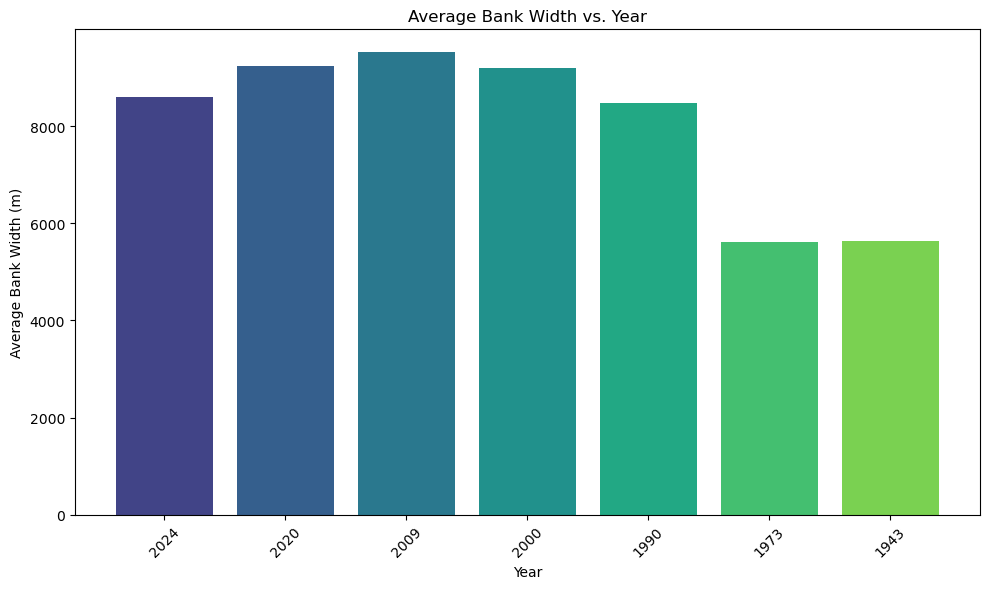

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
years = ["2024", "2020", "2009", "2000", "1990", "1973", "1943"]
data = [
    [5228.44, 5460, 5992.51, 6230.69, 6233.30, 5554.05, 5368.77],
    [8180.93, 9700, 10079.25, 9854.94, 8303.75, 7391.18, 9661.27],
    [9845.27, 10600, 13257.72, 12717.47, 11478.17, 10058.81, 12502.11],
    [10122.47, 9930, 10107.58, 10487.85, 9620.09, 10193.24, 8663.15],
    [8939.65, 8650, 8661.20, 8545.97, 8343.22, 6650.59, 3681.31],
    [7527.2, 9450, 9225.82, 8237.13, 7341.26, 4718.90, 6148.27],
    [10679.22, 7580, 7520.74, 7958.18, 6314.64, 5628.44, 8294.58],
    [10950.15, 11000, 11471.55, 10693.03, 9696.53, 9272.00, 7735.32],
    [14696.53, 13300, 13118.83, 11367.70, 9040.77, 8102.88, 5803.81],
    [8242.24, 6890, 6604.37, 5709.76, 3838.35, 3007.77, 5149.53],
    [5662.51, 4780, 4240.70, 6010.61, 6100.34, 6020.42, 5688.25],
    [3645.48, 3390, 3454.96, 3924.68, 4053.28, 3959.80, 1669.20],
    [1228.89, 1460, 1712.16, 1651.01, 1659.35, 1651.91, 1379.76],
    [3845.65, 3300, 3871.88, 3530.39, 3882.88, 3388.79, 3671.42],
    [2219.42, 4270, 4467.63, 4389.21, 2873.80, 1919.18, 1293.62],
    [8072.62, 10400, 10985.24, 10855.39, 10408.60, 2365.33, 4889.89],
    [17493.64, 17900, 18300.31, 18434.54, 18537.71, 5363.99, 2790.30],
    [16070.97, 15600, 16741.57, 16253.38, 14444.87, 5499.94, 3566.56],
    [10911.92, 9810, 10265.99, 9245.19, 8415.00, 6559.09, 8262.13],
    [7055.68, 10900, 10032.59, 8531.38, 8684.54, 6328.62, 5316.04],
    [5298.66, 15000, 13289.80, 12972.14, 12431.65, 4349.38, 7726.61],
    [11611.48, 14300, 14969.54, 14208.96, 13049.97, 4752.33, 7047.00],
    [14831.67, 14600, 15574.62, 14755.01, 13617.85, 7124.93, 5720.97],
    [9090.24, 9260, 10048.31, 9593.36, 9760.04, 6226.19, 5995.85],
    [3355.2, 3590, 3856.19, 3807.81, 3748.20, 4111.90, 2712.24]
]

df = pd.DataFrame(data, columns=years)

# Compute the average bank width for each year
avg_bank_width = df.mean()

# Generate a color gradient
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(avg_bank_width)))

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_bank_width.index, avg_bank_width.values, color=colors)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Bank Width (m)")
plt.title("Average Bank Width vs. Year")
plt.xticks(rotation=45)

# Save the figure
plt.tight_layout()
plt.savefig("Average_Bank_Width_vs_Year.png", dpi=300)

# Show the plot
plt.show()





Heatmap exported as 'River_Migration_Heatmap_Styled.png'


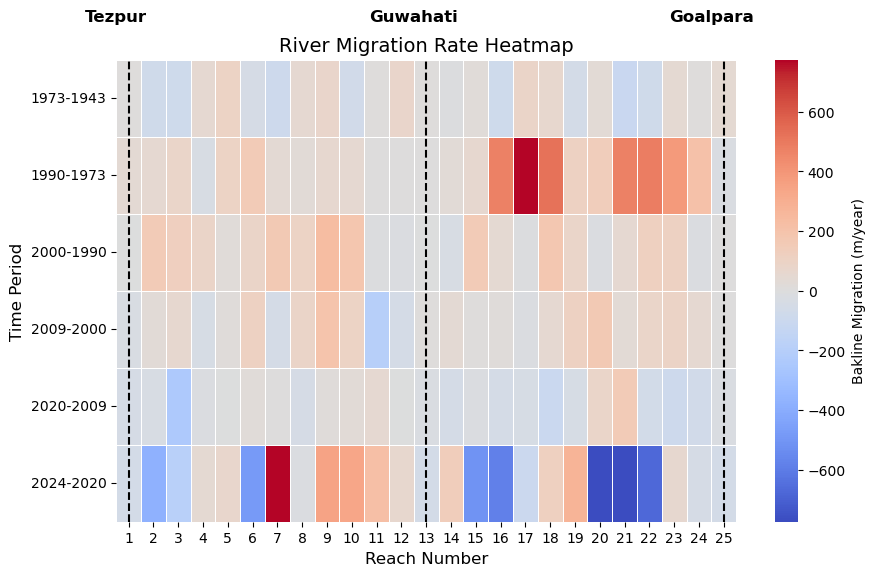

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    "Reach Number": list(range(1, 26)),
    "2024-2020": [-57.89, -379.77, -188.68, 48.12, 72.41, -480.7, 774.81, -12.46, 349.13, 338.06,
                  220.63, 63.87, -57.78, 136.41, -512.65, -581.85, -101.59, 117.74, 275.48, -961.08,
                  -2425.34, -672.13, 57.92, -42.44, -58.7],
    "2020-2009": [-48.41, -34.48, -241.61, -16.14, -1.02, 20.38, 5.39, -42.87, 16.47, 25.97,
                  49.03, -5.91, -22.92, -51.99, -17.97, -53.2, -36.39, -103.78, -41.45, 78.85,
                  155.47, -60.87, -88.6, -71.66, -24.2],
    "2009-2000": [-26.47, 24.92, 60.03, -42.25, 12.80, 109.85, -48.61, 86.50, 194.57, 99.40,
                  -196.66, -52.19, 6.79, 37.94, 8.71, 14.43, -14.91, 54.24, 113.42, 166.80,
                  35.29, 84.51, 91.07, 50.55, 5.38],
    "2000-1990": [-0.26, 155.12, 123.93, 86.78, 20.28, 89.59, 164.35, 99.65, 232.69, 187.14,
                  -8.97, -12.86, -0.83, -35.25, 151.54, 44.68, -10.32, 180.85, 83.02, -15.32,
                  54.05, 115.90, 113.72, -16.67, 5.96],
    "1990-1973": [39.96, 53.68, 83.49, -33.71, 99.57, 154.26, 40.36, 24.97, 55.17, 48.86,
                  4.70, 5.50, 0.44, 29.06, 56.15, 473.13, 774.92, 526.17, 109.17, 138.58,
                  475.43, 488.10, 381.94, 207.87, -21.39],
    "1973-1943": [6.18, -75.67, -81.44, 51.00, 98.98, -47.65, -88.87, 51.22, 76.64, -71.39,
                  11.07, 76.35, 9.07, -9.42, 20.85, -84.15, 85.79, 64.45, -56.77, 33.75,
                  -112.57, -76.49, 46.80, 7.68, 46.66]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Set "Reach Number" as index
df.set_index("Reach Number", inplace=True)

# Transpose the DataFrame so that "Time Period" is on the y-axis
df = df.T[::-1]  # Reversing rows for correct order

# Define locations and corresponding reach numbers
locations = {"Tezpur": 1, "Guwahati": 13, "Goalpara": 25}

# Create the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5, 
                 cbar_kws={"label": "Bakline Migration (m/year)"},
                 center=0, vmin=-775, vmax=775)

# Add vertical dashed lines for specific locations
for loc, reach in locations.items():
    ax.axvline(reach - 0.5, color="black", linestyle="dashed", linewidth=1.5)

# Add text labels for the locations
for loc, reach in locations.items():
    plt.text(reach - 1, -0.5, loc, horizontalalignment="center", fontsize=12, color="black", weight="bold")

# Rotate Y-axis labels horizontally
plt.yticks(rotation=0, fontsize=10)

# Titles & Labels
plt.title("River Migration Rate Heatmap", fontsize=14)
plt.xlabel("Reach Number", fontsize=12)
plt.ylabel("Time Period", fontsize=12)

# Save the heatmap
plt.savefig("River_Migration_Heatmap_Styled.png", dpi=300, bbox_inches="tight")
print("Heatmap exported as 'River_Migration_Heatmap_Styled.png'")

# Show the heatmap
plt.show()


